# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("<Потому что будем использовать что-то рандомное и что бы у меня и у проверяющего были одинаковые случайные числа>")

<Потому что будем использовать что-то рандомное и что бы у меня и у проверяющего были одинаковые случайные числа>


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test #  можно немного сложнее это показать

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


In [6]:
print (df_test.head(5))
print (df_test.tail(5))

                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.info()
# пропуски в mileage, engine, max_power,torque,seats 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [10]:
df_test.info()
# mileage, engine, max_power,torque,seats 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
# your code here
(df_train.drop(columns="selling_price").duplicated()).any()

True

In [12]:
mask = df_train.drop(columns="selling_price").duplicated(keep='first')

In [13]:
df_train[mask].shape[0]

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
df_train[mask]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
df_train = df_train[~mask]

In [16]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [17]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [18]:
df_train = df_train.reset_index(drop=True)

In [19]:
df_train ,df_test

(                                   name  year  selling_price  km_driven  \
 0                Maruti Swift Dzire VDI  2014         450000     145500   
 1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
 2             Hyundai i20 Sportz Diesel  2010         225000     127000   
 3                Maruti Swift VXI BSIII  2007         130000     120000   
 4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
 ...                                 ...   ...            ...        ...   
 5835            Hyundai Santro Xing GLS  2008         120000     191000   
 5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
 5837                  Hyundai i20 Magna  2013         320000     110000   
 5838              Hyundai Verna CRDi SX  2007         135000     119000   
 5839             Maruti Swift Dzire ZDi  2009         382000     120000   
 
         fuel seller_type transmission                 owner     mileage  \
 0     Die

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [20]:
df_train["mileage"] = df_train["mileage"].str.replace(" kmpl", "")
df_train["mileage"] = df_train["mileage"].str.replace(" km/kg", "")
df_train["mileage"] = df_train["mileage"].astype(float)

df_test["mileage"] = df_test["mileage"].str.replace(" kmpl", "")
df_test["mileage"] = df_test["mileage"].str.replace(" km/kg", "")
df_test["mileage"] = df_test["mileage"].astype(float)

In [21]:
df_train["engine"] = df_train["engine"].str[:-3].astype(float)

df_test["engine"] = df_test["engine"].str[:-3].astype(float)

In [22]:
df_train["max_power"] = df_train["max_power"].str[:-3]

df_test["max_power"] = df_test["max_power"].str[:-3]

In [23]:
df_train["max_power"] = df_train["max_power"].str.replace("", "0")
df_train["max_power"] = df_train["max_power"].str.replace(" ", "0")
df_train["max_power"] = df_train["max_power"].astype(float)

df_test["max_power"] = df_test["max_power"].str.replace("", "0")
df_test["max_power"] = df_test["max_power"].str.replace(" ", "0")
df_test["max_power"] = df_test["max_power"].astype(float)

In [24]:
df_train = df_train.drop(columns="torque")

df_test = df_test.drop(columns="torque")

In [25]:
df_train , df_test

(                                   name  year  selling_price  km_driven  \
 0                Maruti Swift Dzire VDI  2014         450000     145500   
 1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
 2             Hyundai i20 Sportz Diesel  2010         225000     127000   
 3                Maruti Swift VXI BSIII  2007         130000     120000   
 4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
 ...                                 ...   ...            ...        ...   
 5835            Hyundai Santro Xing GLS  2008         120000     191000   
 5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
 5837                  Hyundai i20 Magna  2013         320000     110000   
 5838              Hyundai Verna CRDi SX  2007         135000     119000   
 5839             Maruti Swift Dzire ZDi  2009         382000     120000   
 
         fuel seller_type transmission                 owner  mileage  engine  \
 0   

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [26]:
# your code here
medians = df_train[["mileage", "engine", "max_power", "seats"]].median()
medians

mileage          19.3700
engine         1248.0000
max_power    100030.0206
seats             5.0000
dtype: float64

In [27]:
df_train[["mileage", "engine", "max_power", "seats"]] = df_train[["mileage", "engine", "max_power", "seats"]].fillna(medians)

In [28]:
df_test[["mileage", "engine", "max_power", "seats"]] = df_test[["mileage", "engine", "max_power", "seats"]].fillna(medians)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [29]:
print("<Если задаем как, число алгоритмы думают что  будет порядок в числах,а   машины обычно 5- дверные и 8-ми, реже 3,но по сути нельзя сказать что 5-ти лучше на n %  чем 8-ми, так как это просто совершенно разные авто.Так же можно сказать про месяца, если брать числами, то 1 месяц не может же быть в 12 раз меньше чем 12! Надеюсь понятно объяснил>")

<Если задаем как, число алгоритмы думают что  будет порядок в числах,а   машины обычно 5- дверные и 8-ми, реже 3,но по сути нельзя сказать что 5-ти лучше на n %  чем 8-ми, так как это просто совершенно разные авто.Так же можно сказать про месяца, если брать числами, то 1 месяц не может же быть в 12 раз меньше чем 12! Надеюсь понятно объяснил>


In [30]:
df_train[["engine", "seats"]] = df_train[["engine", "seats"]].astype(int)
df_test[["engine", "seats"]] = df_test[["engine", "seats"]].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

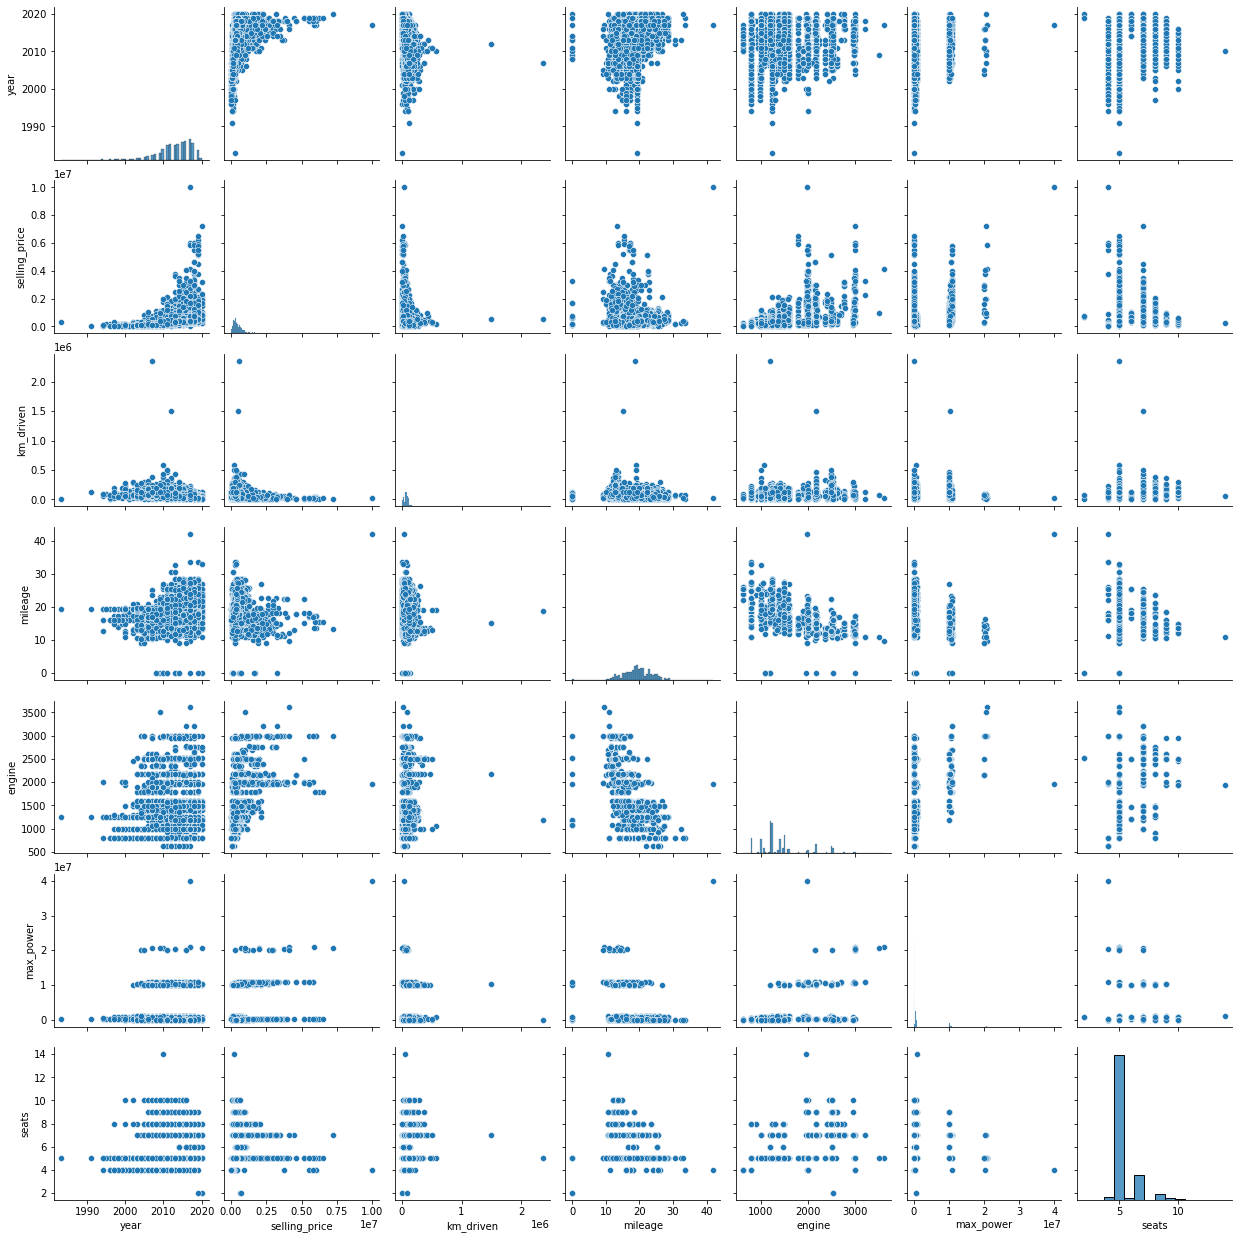

In [31]:
sns.pairplot(df_train)

In [32]:
print('Связь колонок и строчек, если year and year то показывает распределение самой переменной,а если year и selling_price,то как раз показывает как эти 2 переменные связаны.Например, чем дороже машина тем меньше лет ей,чем меньше пробег тем дороже , чем больше мощности тем дороже машина , чем слабее тем дешевле')

Связь колонок и строчек, если year and year то показывает распределение самой переменной,а если year и selling_price,то как раз показывает как эти 2 переменные связаны.Например, чем дороже машина тем меньше лет ей,чем меньше пробег тем дороже , чем больше мощности тем дороже машина , чем слабее тем дешевле


In [33]:
 # y - selling price , x -  предикторы.Цена меняется от различных значений предикторов 

In [34]:
df_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,-0.064054,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.303029,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.118622,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.374800,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.465247,0.652172
max_power,-0.064054,0.303029,0.118622,-0.374800,0.465247,1.000000,0.347283
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.347283,1.000000


In [35]:
print('Year и Y связаны положительно,положительные влияю в + на цену , отрицательные уменьшают ее')

Year и Y связаны положительно,положительные влияю в + на цену , отрицательные уменьшают ее


Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

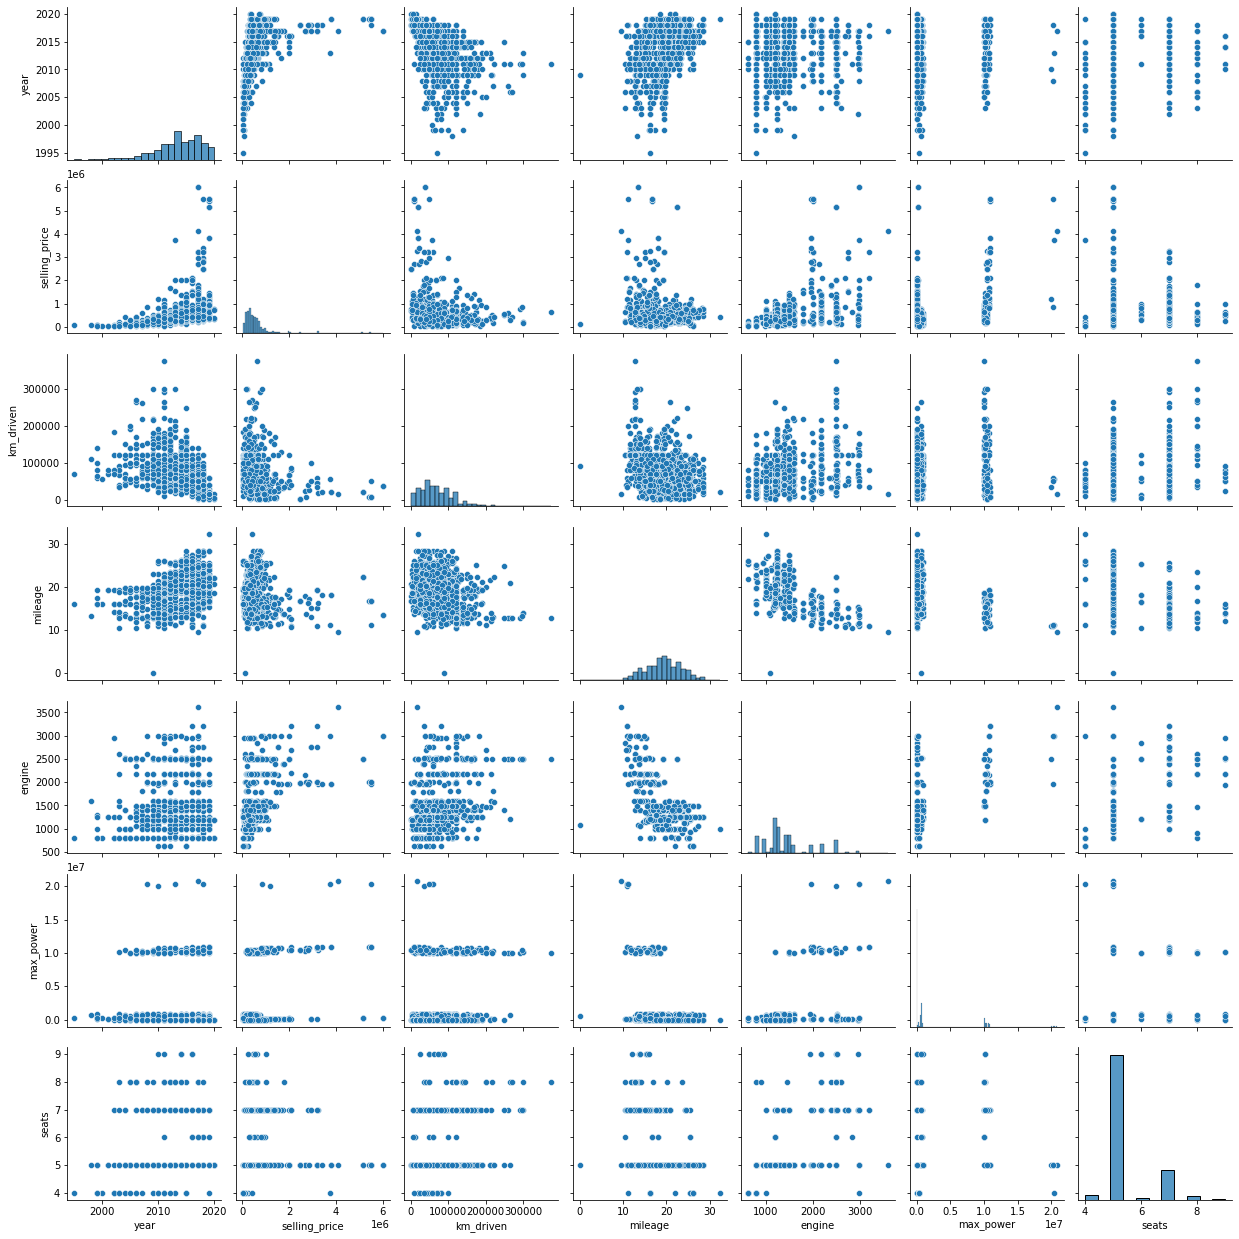

In [36]:
sns.pairplot(df_test)

In [37]:
#Совокупности оказались похожи

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

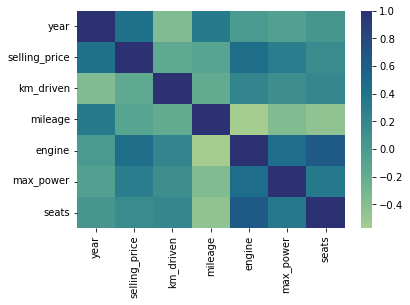

In [38]:
sns.heatmap(df_train.corr(), cmap="crest")

In [39]:
df_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,-0.064054,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.303029,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.118622,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.374800,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.465247,0.652172
max_power,-0.064054,0.303029,0.118622,-0.374800,0.465247,1.000000,0.347283
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.347283,1.000000


In [41]:
df_train.corr() == (df_train.corr()).min().min() # engine + miliage наименее скоррелированы

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,False,False,False,False,False,False,False
selling_price,False,False,False,False,False,False,False
km_driven,False,False,False,False,False,False,False
mileage,False,False,False,False,True,False,False
engine,False,False,False,True,False,False,False
max_power,False,False,False,False,False,False,False
seats,False,False,False,False,False,False,False


In [42]:
df_train.corr() > 0.4 #2) selling price year , у max power  engine 

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,True,True,False,False,False,False,False
selling_price,True,True,False,False,True,False,False
km_driven,False,False,True,False,False,False,False
mileage,False,False,False,True,False,False,False
engine,False,True,False,False,True,True,True
max_power,False,False,False,False,True,True,False
seats,False,False,False,False,True,False,True


In [ ]:
# 3)Чем больше год тем больше проехала,  да - по km_driven

In [ ]:
# 3.1)Если по miliage 6 то наоборот

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [43]:
df_train.corr() == (df_train.corr()[df_train.corr() < 1]).max().max()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,False,False,False,False,False,False,False
selling_price,False,False,False,False,False,False,False
km_driven,False,False,False,False,False,False,False
mileage,False,False,False,False,False,False,False
engine,False,False,False,False,False,False,True
max_power,False,False,False,False,False,False,False
seats,False,False,False,False,True,False,False


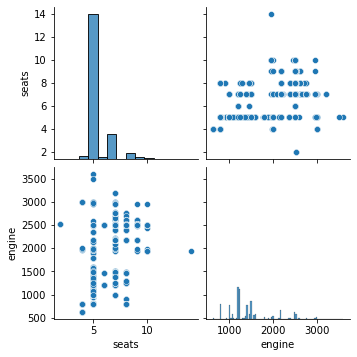

In [44]:
sns.pairplot(df_train[["seats", "engine"]])

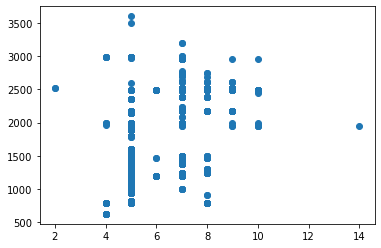

In [45]:
plt.scatter(df_train["seats"], df_train["engine"])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [46]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,7.040000e+05,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,1.000301e+05,5
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,9.000000e+05,5
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,8.080020e+03,5
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,8.010081e+03,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,6.020010e+03,5
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,6.070010e+03,5
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,8.020081e+03,5
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,1.010000e+07,5


In [47]:
y_train = df_train["selling_price"]
X_train = df_train.drop(columns=["selling_price", "name", "fuel", "seller_type", "transmission", "owner"])

In [48]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,7.040000e+05,5
1,2014,120000,21.14,1498,1.000301e+05,5
2,2010,127000,23.00,1396,9.000000e+05,5
3,2007,120000,16.10,1298,8.080020e+03,5
4,2017,45000,20.14,1197,8.010081e+03,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,6.020010e+03,5
5836,2013,50000,18.90,998,6.070010e+03,5
5837,2013,110000,18.50,1197,8.020081e+03,5
5838,2007,119000,16.80,1493,1.010000e+07,5


In [ ]:
assert X_train.shape == (5840, 6)

In [49]:
y_test = df_test["selling_price"]
X_test = df_test.drop(columns=["selling_price", "name", "fuel", "seller_type", "transmission", "owner"])

In [52]:
X_test

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,1.010200e+07,7
1,2017,25000,21.50,1497,1.000801e+05,5
2,2007,218463,12.90,1799,1.030000e+07,5
3,2015,173000,25.10,1498,9.080060e+03,5
4,2011,70000,16.50,1172,6.050000e+05,5
...,...,...,...,...,...,...
995,2008,100000,19.81,1086,6.080001e+03,5
996,2017,50000,18.60,1197,8.010080e+03,5
997,2009,40000,23.00,1396,9.000000e+05,5
998,2012,25000,20.36,1197,7.080090e+03,5


In [54]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print(r2_score(y_test, y_pred))
print(MSE(y_test, y_pred))

0.4789736859821315
299500803536.51385


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [55]:
from sklearn.preprocessing import StandardScaler

# your code here
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)

In [56]:
X_test = sc.transform(X_test)

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print(r2_score(y_test, y_pred))
print(MSE(y_test, y_pred))

0.4789736859820979
299500803536.53326


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [58]:
abs(lin_reg.coef_)

array([216095.15946166,  61240.81085462,   3706.03257196, 309463.02916351,
        92545.96836094, 149128.35487599])

In [59]:
df_train.drop(columns=["selling_price", "name", "fuel", "seller_type", "transmission", "owner"]).columns[3] #engine!

'engine'

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [60]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

print(r2_score(y_test, y_pred))
print(MSE(y_test, y_pred))

0.47897179106168863
299501892790.89514


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [61]:
lasso.coef_

array([ 216095.14030917,  -61239.73723104,    3703.8699048 ,
        309459.38855173,   92544.82270801, -149125.76389394])

In [ ]:
print("не занулила")

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [62]:
%%time

from sklearn.model_selection import GridSearchCV

# your code here
gc = GridSearchCV(Lasso(), param_grid={"alpha":np.linspace(0.1, 1000000, 100)}, scoring="r2", cv=10)
gc.fit(X_train, y_train)

CPU times: user 5.18 s, sys: 118 ms, total: 5.3 s
Wall time: 3.21 s


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-01, 1.01011091e+04, 2.02021182e+04, 3.03031273e+04,
       4.04041364e+04, 5.05051455e+04, 6.06061545e+04, 7.07071636e+04,
       8.08081727e+04, 9.09091818e+04, 1.01010191e+05, 1.11111200e+05,
       1.21212209e+05, 1.31313218e+05, 1.41414227e+05, 1.51515236e+05,
       1.61616245e+05, 1.71717255e+05, 1.81818264e+05, 1...
       7.67676791e+05, 7.77777800e+05, 7.87878809e+05, 7.97979818e+05,
       8.08080827e+05, 8.18181836e+05, 8.28282845e+05, 8.38383855e+05,
       8.48484864e+05, 8.58585873e+05, 8.68686882e+05, 8.78787891e+05,
       8.88888900e+05, 8.98989909e+05, 9.09090918e+05, 9.19191927e+05,
       9.29292936e+05, 9.39393945e+05, 9.49494955e+05, 9.59595964e+05,
       9.69696973e+05, 9.79797982e+05, 9.89898991e+05, 1.00000000e+06])},
             scoring='r2')

In [63]:
gc.best_params_

{'alpha': 20202.11818181818}

In [64]:
gc.best_score_

0.4454127857448091

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [65]:
gc.best_params_

gc.best_estimator_.coef_ #  примерно 5 секунд ,занулился 3 , видимо не информативный

array([200070.37246351, -43867.76603496,     -0.        , 253740.8147011 ,
        73356.03525037, -90274.49603525])

In [66]:
y_pred = gc.best_estimator_.predict(X_test)

print(r2_score(y_test, y_pred))
print(MSE(y_test, y_pred))

0.43334145538418134
325731512741.694


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [76]:
%%time

from sklearn.linear_model import ElasticNet

# your code here
gc = GridSearchCV(ElasticNet(max_iter=15000), param_grid={"alpha":np.linspace(0.1, 1000000, 10), "l1_ratio": np.linspace(0, 1, 10)}, scoring="r2", cv=10)
gc.fit(X_train, y_train)

/Users/tatyana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.631e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/tatyana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.646e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers 

CPU times: user 2min 29s, sys: 893 ms, total: 2min 30s
Wall time: 1min 19s


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=15000),
             param_grid={'alpha': array([1.000000e-01, 1.111112e+05, 2.222223e+05, 3.333334e+05,
       4.444445e+05, 5.555556e+05, 6.666667e+05, 7.777778e+05,
       8.888889e+05, 1.000000e+06]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [70]:
X_train_cat = df_train.drop(columns=["selling_price", "name"])
y_train_cat = df_train["selling_price"]

X_test_cat = df_test.drop(columns=["selling_price", "name"])
y_test_cat = df_test["selling_price"]

In [71]:
assert X_train_cat.shape == (5840, 10)

In [72]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [73]:
from sklearn.preprocessing import OneHotEncoder

# your code here
cat_columns = ["fuel", "seller_type", "transmission", "owner"]
num_columns = ["year", "km_driven", "mileage", "engine", "max_power", "seats"]

ohe = OneHotEncoder(drop="first", sparse=False)
ohe = ohe.fit(X_train_cat[cat_columns])
X_cat = ohe.transform(X_train_cat[cat_columns])

sc = StandardScaler()
sc = sc.fit(X_train_cat[num_columns])
X_num = sc.transform(X_train_cat[num_columns])

X_train_cat = np.concatenate((X_cat, X_num), axis=1)

In [74]:
X_cat = ohe.transform(X_test_cat[cat_columns])

X_num = sc.transform(X_test_cat[num_columns])

X_test_cat = np.concatenate((X_cat, X_num), axis=1)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
gc = GridSearchCV(Lasso(), param_grid={"alpha":np.linspace(0.1, 1000000, 100)}, scoring="r2", cv=10)
gc.fit(X_train, y_train)
g

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-01, 1.01011091e+04, 2.02021182e+04, 3.03031273e+04,
       4.04041364e+04, 5.05051455e+04, 6.06061545e+04, 7.07071636e+04,
       8.08081727e+04, 9.09091818e+04, 1.01010191e+05, 1.11111200e+05,
       1.21212209e+05, 1.31313218e+05, 1.41414227e+05, 1.51515236e+05,
       1.61616245e+05, 1.71717255e+05, 1.81818264e+05, 1...
       7.67676791e+05, 7.77777800e+05, 7.87878809e+05, 7.97979818e+05,
       8.08080827e+05, 8.18181836e+05, 8.28282845e+05, 8.38383855e+05,
       8.48484864e+05, 8.58585873e+05, 8.68686882e+05, 8.78787891e+05,
       8.88888900e+05, 8.98989909e+05, 9.09090918e+05, 9.19191927e+05,
       9.29292936e+05, 9.39393945e+05, 9.49494955e+05, 9.59595964e+05,
       9.69696973e+05, 9.79797982e+05, 9.89898991e+05, 1.00000000e+06])},
             scoring='r2')

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link